### 1/P^2 OPTIMAL DOLLAR COST AVERAGING STRATEGY

     1/P² OPTIMAL DCA – PRICE FALLING LEFT TO RIGHT (INR)

           EXECUTING 1/P² STRATEGY – PRICE FALLING LEFT TO RIGHT
Level  1 | Price: ₹ 100.00 | Target: ₹  4542.47 | Buy:     45 shares | Cost: ₹  4500.00 | ACP: ₹  100.00 | Left: ₹ 95500.00
Level  2 | Price: ₹  92.59 | Target: ₹  5060.19 | Buy:     54 shares | Cost: ₹  4999.86 | ACP: ₹   95.96 | Left: ₹ 90500.14
Level  3 | Price: ₹  85.72 | Target: ₹  5594.70 | Buy:     65 shares | Cost: ₹  5571.80 | ACP: ₹   91.90 | Left: ₹ 84928.34
Level  4 | Price: ₹  79.37 | Target: ₹  6123.95 | Buy:     77 shares | Cost: ₹  6111.49 | ACP: ₹   87.90 | Left: ₹ 78816.85
Level  5 | Price: ₹  73.49 | Target: ₹  6629.10 | Buy:     90 shares | Cost: ₹  6614.10 | ACP: ₹   83.98 | Left: ₹ 72202.75
Level  6 | Price: ₹  68.04 | Target: ₹  7084.63 | Buy:    104 shares | Cost: ₹  7076.16 | ACP: ₹   80.17 | Left: ₹ 65126.59
Level  7 | Price: ₹  63.00 | Target: ₹  7453.65 | Buy:    118 shares | Cost: ₹  7434.00 | ACP: ₹   76.51 | Left: ₹ 57692.59
Level  8

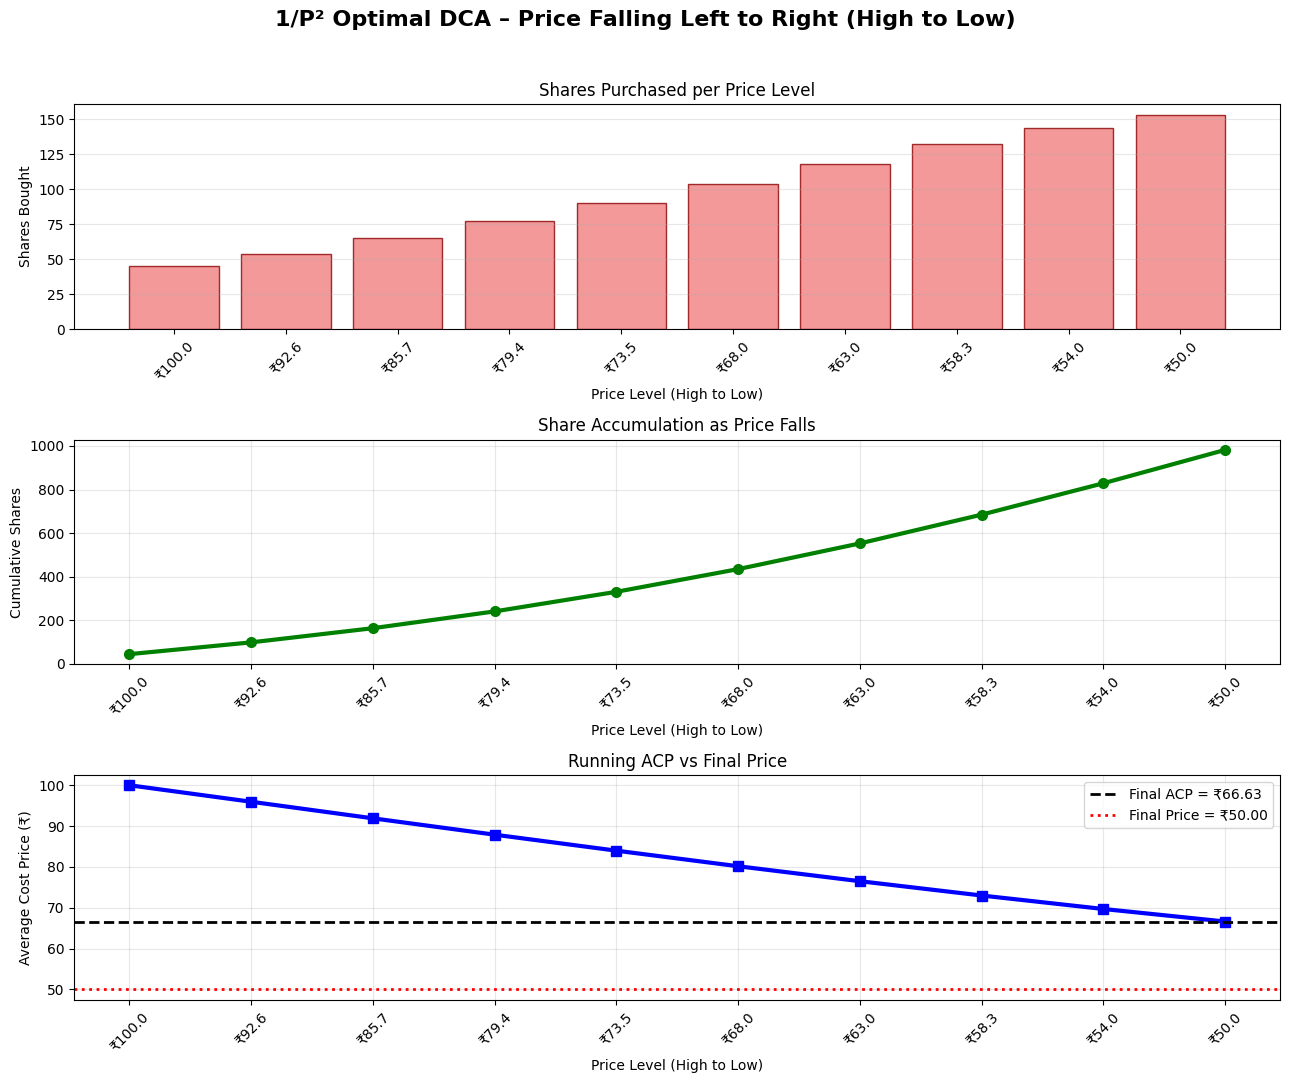

Thank you! Trade smarter as prices fall.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


def optimal_dca_1_over_p2():
    print("=" * 70)
    print("     1/P² OPTIMAL DCA – PRICE FALLING LEFT TO RIGHT (INR)")
    print("=" * 70)

    while True:
        try:
            # === USER INPUT (INR) ===
            total_capital = float(
                input("\nEnter total capital to invest (e.g., 100000): ₹")
            )
            n_steps = int(input("Enter number of buy steps (e.g., 8): "))
            initial_price = float(input("Enter initial (highest) price: ₹"))
            final_price = float(input("Enter final (lowest) price: ₹"))
            sell_price = float(
                input("Enter target sell price for profit simulation: ₹")
            )

            if total_capital <= 0 or n_steps < 2 or initial_price <= final_price:
                print(
                    "Invalid input. Ensure: capital > 0, steps >= 2, initial > final price."
                )
                continue

            # === LOGARITHMIC PRICE GRID: HIGH → LOW (LEFT → RIGHT) ===
            log_prices = np.logspace(
                np.log10(initial_price), np.log10(final_price), n_steps
            )
            prices = np.round(log_prices, 2)  # High to low

            # === 1/P² PROPORTIONAL WEIGHTS ===
            inv_p2 = 1 / (prices**2)
            weights = inv_p2 / inv_p2.sum()

            # === EXECUTE TRADES WITH CAPITAL CARRY-FORWARD ===
            remaining_capital = total_capital
            shares_bought = []
            capital_used = []
            cum_shares_list = []
            running_acp_list = []
            total_shares = 0
            total_cost = 0

            print("\n" + "=" * 95)
            print("           EXECUTING 1/P² STRATEGY – PRICE FALLING LEFT TO RIGHT")
            print("=" * 95)

            for i, (price, weight) in enumerate(zip(prices, weights)):
                target_capital = remaining_capital * weight
                max_shares = int(target_capital // price)
                actual_cost = max_shares * price
                remaining_capital -= actual_cost

                total_shares += max_shares
                total_cost += actual_cost

                shares_bought.append(max_shares)
                capital_used.append(actual_cost)
                cum_shares_list.append(total_shares)
                running_acp = total_cost / total_shares if total_shares > 0 else price
                running_acp_list.append(running_acp)

                print(
                    f"Level {i+1:2d} | Price: ₹{price:7.2f} | Target: ₹{target_capital:9.2f} "
                    f"| Buy: {max_shares:6d} shares | Cost: ₹{actual_cost:9.2f} | "
                    f"ACP: ₹{running_acp:8.2f} | Left: ₹{remaining_capital:9.2f}"
                )

            final_acp = total_cost / total_shares if total_shares > 0 else 0
            profit = total_shares * (sell_price - final_acp)
            profit_pct = (profit / total_capital) * 100 if total_capital > 0 else 0
            unutilized = total_capital - total_cost

            # === LOSS IF PRICE STAYS AT FINAL PRICE ===
            portfolio_value_at_final = total_shares * final_price
            loss_if_stuck = portfolio_value_at_final - total_cost
            loss_pct = (loss_if_stuck / total_cost) * 100 if total_cost > 0 else 0

            # === FINAL TRADING PLAN TABLE ===
            df = pd.DataFrame(
                {
                    "Price (₹)": prices,
                    "Target Capital (₹)": np.round(total_capital * weights, 2),
                    "Shares Bought": shares_bought,
                    "Actual Cost (₹)": capital_used,
                    "Cumulative Shares": cum_shares_list,
                    "Running ACP (₹)": np.round(running_acp_list, 4),
                }
            )

            print("\n" + "=" * 95)
            print(
                "                     FINAL TRADING PLAN – PRICE FALLING LEFT TO RIGHT"
            )
            print("=" * 95)
            print(df.to_string(index=False))

            print("\n" + "-" * 95)
            print(f"TOTAL CAPITAL COMMITTED       : ₹{total_cost:,.2f}")
            print(f"UNUTILIZED CAPITAL            : ₹{unutilized:,.2f}")
            print(f"TOTAL SHARES ACQUIRED         : {total_shares:,}")
            print(f"FINAL AVERAGE COST PRICE      : ₹{final_acp:,.4f}")
            print(
                f"PROFIT if sold at ₹{sell_price:,.2f}    : ₹{profit:,.2f} ({profit_pct:+.2f}%)"
            )
            print(
                f"PORTFOLIO VALUE at ₹{final_price:,.2f}   : ₹{portfolio_value_at_final:,.2f}"
            )
            print(
                f"LOSS IF PRICE STAYS at ₹{final_price:,.2f} : ₹{loss_if_stuck:,.2f} ({loss_pct:+.2f}%)"
            )
            print("-" * 95)

            # === VISUALIZATION: PRICE FALLING LEFT TO RIGHT ===
            fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(13, 11), dpi=100)
            fig.suptitle(
                "1/P² Optimal DCA – Price Falling Left to Right (High to Low)",
                fontsize=16,
                fontweight="bold",
            )

            x_labels = [f"₹{p:,.1f}" for p in prices]

            # 1. Shares Bought per Level
            ax1.bar(
                range(len(prices)),
                shares_bought,
                color="lightcoral",
                edgecolor="darkred",
                alpha=0.8,
            )
            ax1.set_xlabel("Price Level (High to Low)")
            ax1.set_ylabel("Shares Bought")
            ax1.set_title("Shares Purchased per Price Level")
            ax1.set_xticks(range(len(prices)))
            ax1.set_xticklabels(x_labels, rotation=45)
            ax1.grid(True, axis="y", alpha=0.3)

            # 2. Cumulative Shares
            ax2.plot(
                range(len(prices)),
                cum_shares_list,
                marker="o",
                color="green",
                linewidth=3,
                markersize=7,
            )
            ax2.set_xlabel("Price Level (High to Low)")
            ax2.set_ylabel("Cumulative Shares")
            ax2.set_title("Share Accumulation as Price Falls")
            ax2.set_xticks(range(len(prices)))
            ax2.set_xticklabels(x_labels, rotation=45)
            ax2.grid(True, alpha=0.3)

            # 3. Running ACP
            ax3.plot(
                range(len(prices)),
                running_acp_list,
                marker="s",
                color="blue",
                linewidth=3,
                markersize=7,
            )
            ax3.axhline(
                final_acp,
                color="black",
                linestyle="--",
                linewidth=2,
                label=f"Final ACP = ₹{final_acp:,.2f}",
            )
            ax3.axhline(
                final_price,
                color="red",
                linestyle=":",
                linewidth=2,
                label=f"Final Price = ₹{final_price:,.2f}",
            )
            ax3.set_xlabel("Price Level (High to Low)")
            ax3.set_ylabel("Average Cost Price (₹)")
            ax3.set_title("Running ACP vs Final Price")
            ax3.set_xticks(range(len(prices)))
            ax3.set_xticklabels(x_labels, rotation=45)
            ax3.legend()
            ax3.grid(True, alpha=0.3)

            plt.tight_layout(rect=[0, 0, 1, 0.96])
            plt.show()

            # === RE-RUN OPTION ===
            again = input("\nRun again with new parameters? (y/n): ").strip().lower()
            if again != "y":
                print("Thank you! Trade smarter as prices fall.")
                break

        except ValueError:
            print("Please enter valid numbers.")
        except Exception as e:
            print(f"Error: {e}")


# === RUN THE PROGRAM ===
if __name__ == "__main__":
    optimal_dca_1_over_p2()